In [1]:
from ALMApy import run_alma, change_param, read_output
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})


In [2]:
m_mars = 6.4171e23  # kg
R_mars = 3.3895e6  # m
rho_mars = m_mars/(4*np.pi/3*R_mars**3)

rho_air = 1.293

In [4]:
N_steps = 10
atmosphere_heights = np.linspace(0, 100e3, N_steps)
data = []
for i,atm_height in enumerate(atmosphere_heights):
    t,k = run_alma(radii = [R_mars+atm_height, R_mars],
                   densities = [rho_air, rho_mars],
                   rigidities = [1e-7,1.46e11],
                   viscosities = [3e-5,1e21],
                   model_types = ["newton", "maxwell"],
                   show_start_stop = False)
    
    data.append({"height": atm_height,
                 "t": t,
                 "k": k})

    print(f"{(i+1)/N_steps*100:.0f}% done")

10% done
20% done
30% done
40% done
50% done
60% done
70% done
80% done
90% done
100% done


<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1355/2945051663.py:34: SyntaxWarning: invalid escape sequence '\m'
  """


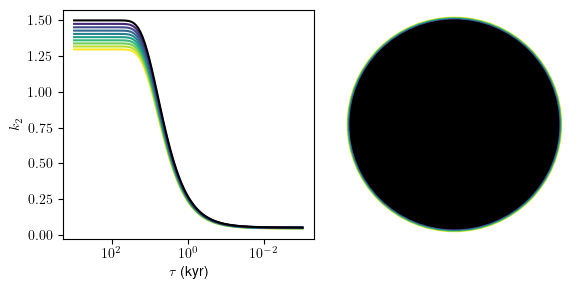

In [ ]:
# Setup colormap
norm = mcolors.Normalize(vmin=0, vmax=100e3)
cmap = cm.viridis  # You can change this to any Matplotlib colormap
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, axes = plt.subplots(figsize=(6,3), ncols=2)
for i, model in enumerate(data):
    color = cmap(norm(model["height"]))
    if i == 0: color = "black"
    # Plot love number
    axes[0].plot(model["t"],model["k"], color=color, label=f"$h={model['height']/1e3:.0f}$ km", zorder=(len(data)-i)/10)

    # Show circle of radius`
    circle = plt.Circle((0,0),(R_mars+model["height"])/R_mars, color=color, zorder=(len(data)-i)/10)
    axes[1].add_patch(circle)

axes[0].set_xscale("log")
axes[0].xaxis.set_inverted(True)
axes[0].set_xlabel(r"$\tau$ (kyr)")
axes[0].set_ylabel(r"$k_2$")

lims = 1.1
axes[1].set_xlim(-lims,lims)
axes[1].set_ylim(-lims,lims)
axes[1].set_aspect("equal")
axes[1].axis("off")

# Plot core
circle = plt.Circle((0,0),1, color="black",zorder=10)
axes[1].add_patch(circle)

# Plot boundaries
"""
phi = np.linspace(0,2*np.pi,100)
axes[1].plot(R_neptune/R_jupiter*np.cos(phi), R_neptune/R_jupiter*np.sin(phi), zorder=11, color='white')
axes[1].text(0, R_neptune/R_jupiter, r"$R_\mathrm{Nep}$", fontsize=13, ha="center", va="bottom", color="white")
axes[1].plot(np.cos(phi), np.sin(phi), color="black")
axes[1].text(0, 1, r"$R_\mathrm{Jup}$", fontsize=13, ha="center", va="bottom", color="black")
axes[1].text(0, 0, r"$\rho_\mathrm{Nep}$", fontsize=13, ha="center", va="center", zorder=12, color="white")
axes[1].text((R_neptune/R_jupiter+1)/2, 0, r"$\rho_\mathrm{air}$", fontsize=13, ha="center", va="center", zorder=12, color="black")
"""
fig.tight_layout()
plt.show()

In [14]:
change_param("time_points_minus_one", 2)

N_steps = 500
atmosphere_heights = np.linspace(0, 100e3, N_steps)
data_R1 = []
k2_values = np.zeros(N_steps)
for i,atm_radius in enumerate(atmosphere_heights):
    t,k = run_alma(radii = [R_mars+atm_radius, R_mars],
                   densities = [rho_air, rho_mars],
                   rigidities = [1e-7,1.46e11],
                   viscosities = [3e-5,1e21],
                   model_types = ["newton", "maxwell"],
                   show_start_stop = False)
    
    data_R1.append({"radius": atm_radius,
                 "t": t,
                 "k": k})
    k2_values[i] = k[0]
    print(f"{i/N_steps*100:.0f}% done")

change_param("time_points_minus_one", 100)

0% done
0% done
0% done
1% done
1% done
1% done
1% done
1% done
2% done
2% done
2% done
2% done
2% done
3% done
3% done
3% done
3% done
3% done
4% done
4% done
4% done
4% done
4% done
5% done
5% done
5% done
5% done
5% done
6% done
6% done
6% done
6% done
6% done
7% done
7% done
7% done
7% done
7% done
8% done
8% done
8% done
8% done
8% done
9% done
9% done
9% done
9% done
9% done
10% done
10% done
10% done
10% done
10% done
11% done
11% done
11% done
11% done
11% done
12% done
12% done
12% done
12% done
12% done
13% done
13% done
13% done
13% done
13% done
14% done
14% done
14% done
14% done
14% done
15% done
15% done
15% done
15% done
15% done
16% done
16% done
16% done
16% done
16% done
17% done
17% done
17% done
17% done
17% done
18% done
18% done
18% done
18% done
18% done
19% done
19% done
19% done
19% done
19% done
20% done
20% done
20% done
20% done
20% done
21% done
21% done
21% done
21% done
21% done
22% done
22% done
22% done
22% done
22% done
23% done
23% done
23% done
23% 

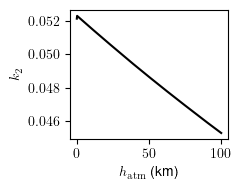

In [18]:
fig, ax = plt.subplots(figsize=(2.5,2))
ax.plot(atmosphere_heights/1e3, k2_values, color="black")
ax.set_xlabel(r"$h_\mathrm{atm}$ (km)")
ax.set_ylabel(r"$k_2$")
fig.tight_layout()
fig.savefig("figures/mars_atmosphere.png", dpi=300, bbox_inches="tight")
plt.show()

In [20]:
print(((R_mars+atmosphere_heights[-1])/(R_mars+atmosphere_heights[0]))**(-5))
print(k2_values[-1]*(R_mars+atmosphere_heights[-1])**5/(k2_values[0]*(R_mars+atmosphere_heights[0])**5))

0.8646934672895231
1.004551338815533


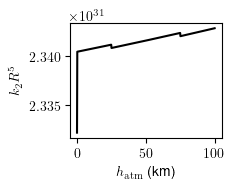

In [26]:
fig, ax = plt.subplots(figsize=(2.5,2))
ax.plot(atmosphere_heights/1e3, k2_values*(R_mars+atmosphere_heights)**5, color="black")
ax.set_xlabel(r"$h_\mathrm{atm}$ (km)")
ax.set_ylabel(r"$k_2R^5$")
fig.tight_layout()
fig.savefig("figures/mars_atmosphere_k2R5.png", dpi=300, bbox_inches="tight")
plt.show()